# What is a Model?

## Motivation

How do we study systems we cannot directly observe? We build models and test how those models work.  Maps and weather forecasts, for examples, are models of systems or processes of which we cannot make a complete, direct observation.  In Chemistry, we cannot directly observe atoms and molecules and thus must make inferences, construct models, and test the limitations of these models. 

## Learning Objectives

After working through this notebook, you will be able to:

1. Define what is meant by a scientific model and distinguish models from theories and laws.
2. Explain how models are used to generate predictions and test hypotheses within the scientific method.
3. Identify assumptions and limitations inherent in different types of molecular models.
4. item Compare empirical, conceptual, and computational models used in chemistry.

## Coding Concepts

The following coding concepts are employed in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concetps/plotting_with_matplotlib.ipynb)

# The Scientific Method

Science seeks to understand and predict natural phenomena through a systematic process known as
the scientific method. While the details of this process vary across disciplines, its essential
components are common to all areas of science, including chemistry. The scientific method is often summarized as a sequence of observation, hypothesis formation,prediction, experimentation, and refinement. 

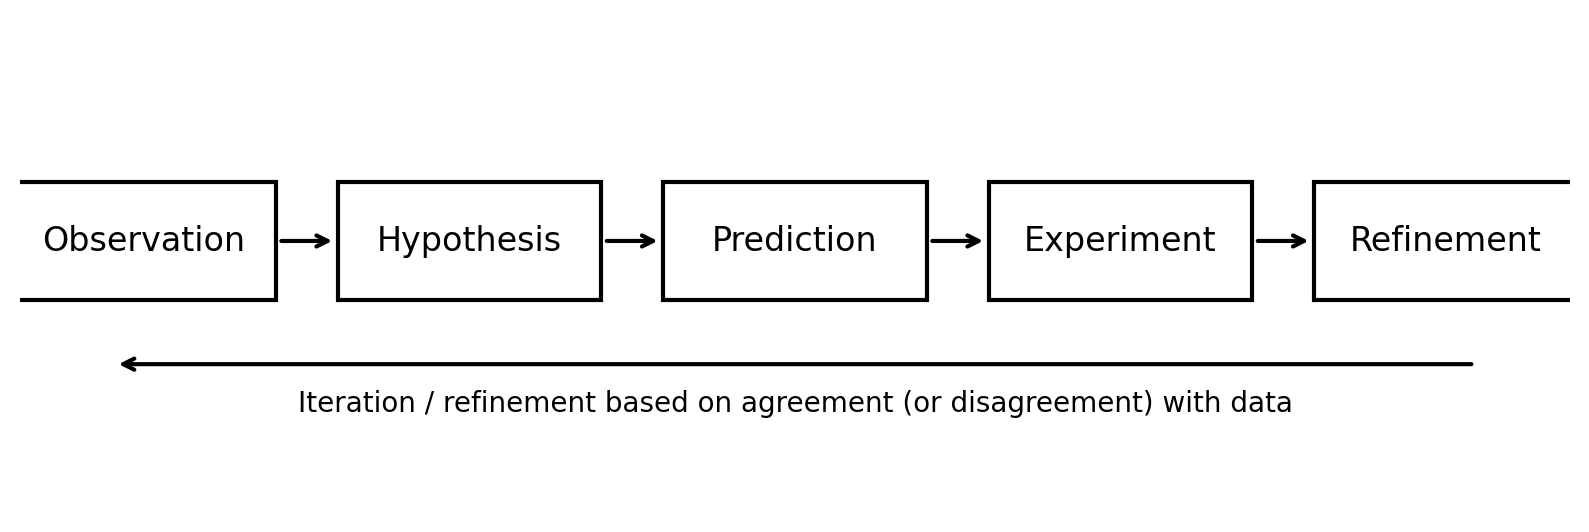

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Figure 1: Scientific Method Flowchart ----------
plt.figure(figsize=(10, 3.2), dpi=200)
ax = plt.gca()
ax.set_axis_off()

steps = ["Observation", "Hypothesis", "Prediction", "Experiment", "Refinement"]
x = np.linspace(0.08, 0.92, len(steps))
y = np.full_like(x, 0.55)

# Draw boxes
for xi, label in zip(x, steps):
    ax.add_patch(plt.Rectangle((xi-0.085, y[0]-0.12), 0.17, 0.24, fill=False, linewidth=1.5))
    ax.text(xi, y[0], label, ha='center', va='center', fontsize=12)

# Arrows between boxes
for i in range(len(steps)-1):
    ax.annotate(
        "", xy=(x[i+1]-0.085, y[0]), xytext=(x[i]+0.085, y[0]),
        arrowprops=dict(arrowstyle="->", linewidth=1.5)
    )

# Iteration arrow (loop back)
ax.annotate(
    "", xy=(x[0]-0.02, 0.30), xytext=(x[-1]+0.02, 0.30),
    arrowprops=dict(arrowstyle="->", linewidth=1.5)
)
ax.text(0.5, 0.22, "Iteration / refinement based on agreement (or disagreement) with data",
        ha='center', va='center', fontsize=10)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show();

## Observation

Scientific inquiry begins with observation. Observations may arise from direct measurement,
experimental results, or patterns noticed in existing data. Importantly, observations need not
be explained at the outset; their role is to identify regularities or anomalies that warrant
further investigation.

**Example.** Consider a set of measurements made on a fixed amount of gas contained in a
sealed cylinder with a movable piston. An experimenter observes that as the volume of the gas
is decreased, the measured pressure increases. Repeating the measurement at different volumes
reveals a consistent inverse relationship between pressure and volume under otherwise identical
conditions.

At this stage, no explanation is proposed—only the empirical relationship is noted.

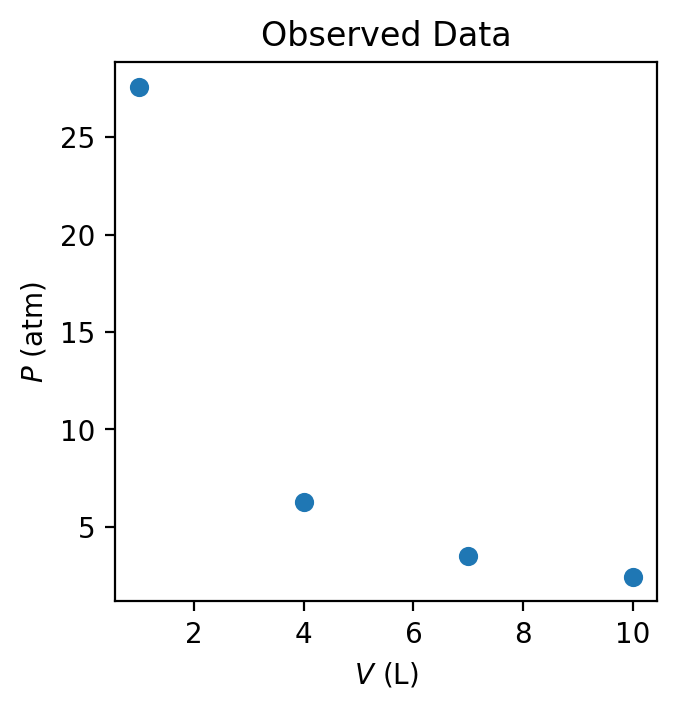

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# ---------- Figure 2: Ideal Gas Prediction vs. "Real Gas" Deviations ----------
# Synthetic data: follows PV ~ constant at moderate V, deviates at small V (high density).
rng = np.random.default_rng(7)

R = 0.082057  # L·atm·mol^-1·K^-1
T = 300.0     # K
n = 1.0       # mol
PV_const = n * R * T  # ideal PV

V = np.linspace(1.0, 10.0, 4)  # liters
P_ideal = PV_const / V

# "Real gas" pressures: systematic deviation at small V + small random noise
deviation = 1 + 0.12*np.exp(-(V-1.0)/1.5)
noise = rng.normal(0, 0.015, size=V.size)
P_real = P_ideal * deviation * (1 + noise)

plt.figure(figsize=(3.5, 3.5), dpi=200)
plt.scatter(V, P_real, s=35, label="Synthetic experimental data")
plt.xlabel(r"$V\ \mathrm{(L)}$")
plt.ylabel(r"$P\ \mathrm{(atm)}$")
plt.title("Observed Data")
#plt.legend(frameon=True)
plt.show();

## Hypothesis

A hypothesis is a tentative explanation for an observed phenomenon. It is typically qualitative
and framed in a way that allows it to be tested. A good hypothesis is not simply a restatement
of the observation but proposes an underlying cause or mechanism.

**Example.** To explain the observed pressure--volume relationship, one might hypothesize
that pressure arises from collisions of gas particles with the walls of the container, and that
reducing the volume increases the frequency of these collisions, thereby increasing the pressure.

This hypothesis introduces an underlying mechanism but does not yet make a quantitative claim.

## Prediction

From a hypothesis, one derives predictions—specific, testable statements about what should
occur under defined conditions if the hypothesis is correct. Predictions are often quantitative
and allow for direct comparison with experimental results.

**Example.** From the collision-based hypothesis, one might predict that halving the volume
of the gas (while keeping temperature and amount of gas constant) should approximately double
the pressure. More generally, one might predict that the product of pressure and volume remains
constant over a range of conditions.

Predictions transform a qualitative hypothesis into statements that can be tested.

## Experiment

Experiments are designed to test predictions by controlling relevant variables and measuring
outcomes. The results of an experiment either support the predictions, contradict them, or
suggest that additional factors must be considered.

**Example.** An experimenter systematically varies the volume of the gas while measuring
the pressure, ensuring that temperature and the amount of gas remain constant. The resulting
data are analyzed to determine whether the predicted inverse relationship holds and whether
the product of pressure and volume remains approximately constant.

Careful experimental design is essential to ensure that the test meaningfully addresses the
prediction.

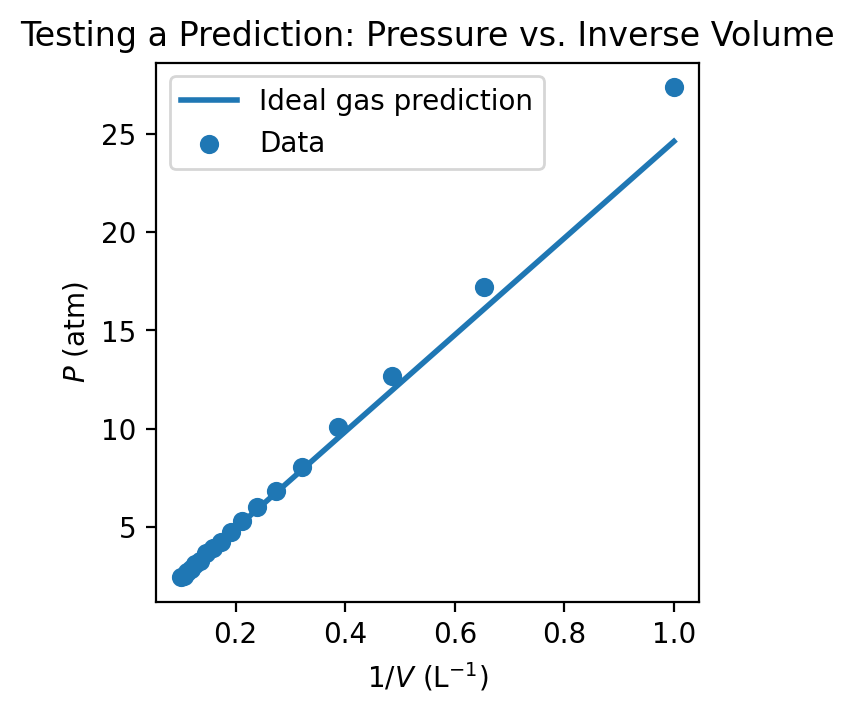

In [3]:
import numpy as np
import matplotlib.pyplot as plt


V = np.linspace(1.0, 10.0, 18)  # liters
P_ideal = PV_const / V

# "Real gas" pressures: systematic deviation at small V + small random noise
deviation = 1 + 0.12*np.exp(-(V-1.0)/1.5)
noise = rng.normal(0, 0.015, size=V.size)
P_real = P_ideal * deviation * (1 + noise)

# Plot 2A: P vs 1/V (tests linear prediction)
invV = 1.0 / V
invV_line = np.linspace(invV.min(), invV.max(), 200)
P_line = PV_const * invV_line

plt.figure(figsize=(3.5, 3.5), dpi=200)
plt.plot(invV_line, P_line, linewidth=2, label="Ideal gas prediction")
plt.scatter(invV, P_real, s=35, label="Data")
plt.xlabel(r"$1/V\ \mathrm{(L^{-1})}$")
plt.ylabel(r"$P\ \mathrm{(atm)}$")
plt.title("Testing a Prediction: Pressure vs. Inverse Volume")
plt.legend(frameon=True)
plt.show();

## Refinement

Scientific knowledge advances through refinement. When predictions agree with experiment,
confidence in the hypothesis increases, but this does not imply that the explanation is complete
or final. When predictions fail, the hypothesis must be revised or replaced. Refinement may
involve adjusting assumptions, identifying missing variables, or developing a new conceptual
framework.

**Example.** While the pressure-volume relationship holds under many conditions, deviations
are observed at high pressures or low temperatures. These discrepancies suggest that additional
factors—such as the finite size of particles or interactions between them—must be considered.
The original hypothesis is therefore refined to account for these effects, leading to improved
descriptions of gas behavior.

Refinement is an ongoing process, and scientific understanding evolves as new data become
available.

# The Role of Models in the Scientific Method

A ***scientific model*** is a simplified representation of a system that captures the features
relevant to a particular question. Models allow scientists to translate hypotheses into
quantitative predictions that can be tested against experiment. When predictions agree with
observation, confidence in the model increases; when they disagree, the model must be revised,
refined, or replaced.

In chemistry, models frequently serve as the bridge between microscopic structure and
macroscopic observables. For example, a model of intermolecular interactions allows one to
predict boiling points, diffusion constants, or reaction rates—quantities that are directly
measured in experiments but arise from molecular-scale behavior.

## Models, Theories, and Laws

It is important to distinguish between models, theories, and laws, terms that are often used
interchangeably in informal discussion but have distinct meanings in scientific practice.

A ***law*** summarizes an observed regularity in nature, often in mathematical form (e.g.,
the ideal gas law). A ***theory*** provides a broad explanatory framework that accounts for
multiple laws and observations (e.g., quantum mechanics). A ***model*** is a specific
implementation or approximation derived from a theory, tailored to a particular system or
question.

For example, quantum mechanics is a theory, the Schrödinger equation is a mathematical
statement of that theory, and a Hartree-Fock calculation using a finite basis set is a model.
Each step introduces assumptions and approximations that affect the accuracy and applicability
of the results.

## Types of Models in Chemistry

Chemical models can be broadly categorized into conceptual, mathematical, and computational
models, though these categories often overlap.

### Conceptual Models

Conceptual models provide qualitative insight into chemical behavior. Examples include Lewis
structures, valence bond diagrams, and resonance structures. These models are not derived
directly from first principles, but they are invaluable for building intuition about bonding,
reactivity, and molecular structure.

While conceptual models are simple and easily communicated, they often lack predictive power
for quantitative properties. For instance, Lewis structures cannot reliably predict reaction
barriers or spectroscopic frequencies.

### Mathematical Models

Mathematical models express chemical behavior using equations derived from physical principles.
The Schrödinger equation is a central example in chemistry, providing a formal description of
electronic structure. Similarly, classical mechanics yields equations of motion that underlie
molecular dynamics simulations.

Mathematical models are typically exact in form but impossible to solve analytically for systems
of realistic size. As a result, further approximations are required before they can be applied
in practice.

### Computational Models

Computational models arise when mathematical models are combined with numerical methods and
approximations to produce concrete predictions. Examples include density functional theory,
molecular mechanics force fields, and molecular dynamics simulations.

In computational chemistry, the term "model" often refers to the entire workflow: the choice
of physical description, the approximations made, the numerical algorithms employed, and the
parameters used. Different computational models may yield different predictions even when
applied to the same system.

## Assumptions and Approximations

All models rely on assumptions. These assumptions determine the range of validity of the model
and must be understood in order to interpret results correctly.

In quantum chemistry, common approximations include the Born-Oppenheimer separation of nuclear
and electronic motion, the use of finite basis sets, and mean-field treatments of electron
correlation. In molecular mechanics, electrons are not treated explicitly at all; instead,
their effects are incorporated into parameterized functional forms.

Approximations are not flaws but deliberate choices. A simpler model may provide clearer insight
or allow simulations of larger systems, while a more detailed model may offer higher accuracy
at greater computational cost. ***The appropriate model depends on the scientific question being
asked.***

## Models as Predictive Tools

A central purpose of modeling is prediction. A useful model should make predictions that can be
tested against experimental data or higher-level calculations. Agreement with experiment does
not imply that a model is "true," but rather that it is adequate for the phenomena under
consideration.

For example, a molecular mechanics force field may accurately reproduce protein structures and
dynamics while failing to describe chemical reactions. This limitation does not invalidate the
model; it defines its domain of applicability.

## Model Validation and Refinement

When model predictions disagree with experiment, several possibilities must be considered.
The model may omit important physical effects, its parameters may be inappropriate for the
system under study, or the experimental conditions may not be correctly represented.

Model refinement is an iterative process. In computational chemistry, this often involves adding
degrees of freedom, improving parameterization, or adopting a different theoretical framework.
Throughout this process, computational results must be interpreted critically rather than
accepted unconditionally.